# Rain Prediction

In [77]:
from IPython.display import HTML
HTML("""
<style>
h1,h2,h3 {
	margin: 1em 0 0.5em 0;
	font-weight: 600;
	font-family: 'Titillium Web', sans-serif;
	position: relative;  
	font-size: 36px;
	line-height: 40px;
	padding: 15px 15px 15px 2.5%;
	color: #13003A;
	box-shadow: 
		inset 0 0 0 1px rgba(53,86,129, 1), 
		inset 0 0 5px rgba(53,86,129, 1),
		inset -285px 0 35px white;
	border-radius: 0 10px 0 15px;
	background: #fff
    
}
</style>
""")

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [79]:
rain = pd.read_csv("SA2021_W3_Data.csv")

In [80]:
rain.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2856,11,18.3,35.4,0.0,10.7,8.2,15,31,0,...,17,14,1012.8,1010.7,3,7,26.3,34.0,0,1
1,575,0,12.0,21.1,0.0,2.4,4.9,11,22,15,...,70,60,1022.3,1020.2,2,7,16.2,19.4,0,0


In [81]:
rain.shape

(24196, 23)

In [82]:
rain.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,...,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000
mean,1702.554430,11.126880,13.281232,23.124078,3.008857,5.114329,6.700591,7.752273,42.371880,7.315424,...,69.505621,55.335345,1016.774682,1014.508518,4.767152,4.926682,17.609216,21.493420,0.293396,0.453918
std,837.645705,6.397324,6.084032,6.681013,8.399269,3.549384,3.958287,4.788052,14.221336,4.634019,...,17.671186,20.907040,6.987625,6.877345,2.741416,2.586083,6.189396,6.535474,0.455328,0.497882
min,0.000000,0.000000,-4.700000,4.100000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,...,3.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000
25%,984.000000,6.000000,8.600000,17.900000,0.000000,2.400000,3.400000,3.000000,31.000000,3.000000,...,58.000000,41.000000,1012.200000,1009.900000,2.000000,3.000000,12.700000,16.500000,0.000000,0.000000
50%,1651.000000,11.000000,13.100000,22.700000,0.000000,4.400000,7.200000,8.000000,41.000000,7.000000,...,70.000000,56.000000,1016.800000,1014.400000,6.000000,6.000000,17.300000,21.100000,0.000000,0.000000
75%,2381.000000,17.000000,18.000000,28.100000,1.800000,7.000000,10.000000,12.000000,50.000000,11.000000,...,83.000000,70.000000,1021.400000,1019.000000,7.000000,7.000000,22.300000,26.200000,1.000000,1.000000
max,3415.000000,22.000000,31.400000,46.800000,206.200000,59.800000,14.500000,15.000000,122.000000,15.000000,...,100.000000,100.000000,1040.200000,1037.000000,8.000000,9.000000,39.400000,46.100000,1.000000,1.000000


<AxesSubplot:>

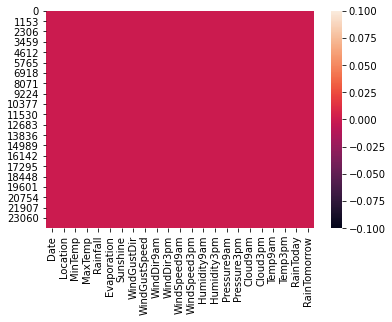

In [83]:
sns.heatmap(rain.isnull())
#No missing values are thre

In [84]:
rain.dtypes

Date               int64
Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed      int64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am       int64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

In [85]:
rain[["Location","WindGustDir","WindDir9am","WindDir3pm","Cloud3pm","Cloud9am"]]=rain[["Location","WindGustDir","WindDir9am","WindDir3pm","Cloud3pm","Cloud9am"]].astype("category")

In [86]:
# Labeling the categorical datas
from sklearn.preprocessing import LabelEncoder

In [87]:
le_location = LabelEncoder()
le_windgustdir = LabelEncoder()
le_winddir9am = LabelEncoder()
le_winddir3pm = LabelEncoder()
le_cloud3pm = LabelEncoder()
le_cloud9am = LabelEncoder()

In [88]:
rain["le_location"] = le_location.fit_transform(rain["Location"])
rain["le_WindGustDir"] = le_location.fit_transform(rain["WindGustDir"])
rain["le_WindDir9am"] = le_location.fit_transform(rain["WindDir9am"])
rain["le_WindDir3pm"] = le_location.fit_transform(rain["WindDir3pm"])
rain["le_Cloud3pm"] = le_location.fit_transform(rain["Cloud3pm"])
rain["le_Cloud9am"] = le_location.fit_transform(rain["Cloud9am"])

In [89]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp9am,Temp3pm,RainToday,RainTomorrow,le_location,le_WindGustDir,le_WindDir9am,le_WindDir3pm,le_Cloud3pm,le_Cloud9am
0,2856,11,18.3,35.4,0.0,10.7,8.2,15,31,0,...,26.3,34.0,0,1,11,15,0,6,7,3
1,575,0,12.0,21.1,0.0,2.4,4.9,11,22,15,...,16.2,19.4,0,0,0,11,15,10,7,2
2,2037,6,11.9,17.0,1.6,5.6,0.8,5,48,4,...,14.6,13.3,1,1,6,5,4,3,7,7
3,2010,19,1.3,10.2,4.2,2.6,4.4,15,33,15,...,3.8,8.5,1,0,19,15,15,13,7,7
4,2895,18,23.7,31.5,0.0,11.0,12.1,4,35,2,...,29.1,30.4,0,0,18,4,2,1,1,3


In [90]:
rain.drop(["Location","WindGustDir","WindDir9am","WindDir3pm","Cloud3pm","Cloud9am","Date"],axis = 1, inplace = True)

In [91]:
rain.shape

(24196, 22)

In [92]:
rain.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp9am,Temp3pm,RainToday,RainTomorrow,le_location,le_WindGustDir,le_WindDir9am,le_WindDir3pm,le_Cloud3pm,le_Cloud9am
0,18.3,35.4,0.0,10.7,8.2,31,17,9,17,14,...,26.3,34.0,0,1,11,15,0,6,7,3
1,12.0,21.1,0.0,2.4,4.9,22,9,9,70,60,...,16.2,19.4,0,0,0,11,15,10,7,2
2,11.9,17.0,1.6,5.6,0.8,48,24,30,71,88,...,14.6,13.3,1,1,6,5,4,3,7,7
3,1.3,10.2,4.2,2.6,4.4,33,15,17,87,64,...,3.8,8.5,1,0,19,15,15,13,7,7
4,23.7,31.5,0.0,11.0,12.1,35,17,28,53,50,...,29.1,30.4,0,0,18,4,2,1,1,3


# Train_Test_Split

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x = rain.drop("RainTomorrow", axis = 1)
y = rain["RainTomorrow"]

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=2021)

# Standarisation

In [114]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler = StandardScaler()

In [124]:
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.fit_transform(x_test)

In [122]:
x_train_scaler

array([[-1.16678017, -0.77057773, -0.35742704, ...,  1.54063881,
        -0.35705854, -1.37641579],
       [-0.60951092, -0.63598142, -0.35742704, ..., -0.7824693 ,
         0.80442712,  0.0835709 ],
       [-1.42902452, -1.54824529,  0.87966959, ...,  1.32944716,
         0.80442712, -1.37641579],
       ...,
       [-1.42902452, -1.14445636, -0.33363672, ..., -0.99366094,
         1.19158901,  1.17856092],
       [ 1.60317579,  1.09881544,  3.18733061, ..., -1.20485259,
         0.41726523,  0.44856758],
       [-0.9700969 , -0.56120569, -0.35742704, ...,  1.11825552,
        -1.5185442 , -0.64642244]])

# SVM Model 1

In [180]:
from sklearn.svm import SVC
svm_model = SVC(C = 50 ,gamma = "scale",probability=True)
svm_model.fit(x_train_scaler,y_train)


SVC(C=50, probability=True)

In [174]:
#train test score
svm_model.score(x_test_scaler,y_test)

0.7857497106959828

In [175]:
svm_model.score(x_train_scaler,y_train)

0.915964071196341

In [176]:
svm_model_val = svm_model.predict(x_test_scaler)
svm_train_val = svm_model.predict(x_train_scaler)

In [177]:
print(classification_report(svm_model_val,y_test))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      3378
           1       0.75      0.77      0.76      2671

    accuracy                           0.79      6049
   macro avg       0.78      0.78      0.78      6049
weighted avg       0.79      0.79      0.79      6049



[[2691  609]
 [ 687 2062]]


<AxesSubplot:>

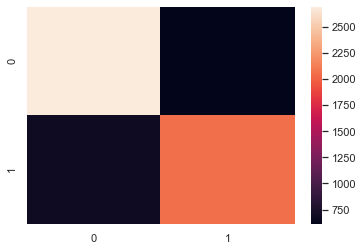

In [222]:
cm2 = confusion_matrix(y_test,svm_model_val)
print(cm2)
sns.heatmap(cm2)

In [179]:
# accuracy_scores
print(accuracy_score(y_train,svm_train_val))
print(accuracy_score(y_test,svm_model_val))
#overfitting

0.915964071196341
0.7857497106959828


In [1]:
pred_probSV = svm_model.predict_proba(x_test_scaler)

NameError: name 'svm_model' is not defined

In [182]:
roc_auc_score(y_test,pred_probSV[:,1])

0.8677032970667018

# SVM Model 2

In [203]:
svm_model2 = SVC(C= 1, gamma = "scale",probability= True)

In [204]:
svm_model2.fit(x_train_scaler,y_train)

SVC(C=1, probability=True)

In [205]:
# model score for test and train
print(svm_model2.score(x_train_scaler,y_train))
print(svm_model2.score(x_test_scaler,y_test))

0.8334159916239599
0.8088940320714167


In [206]:
#model acuuracy score train & test
svm_model2_val = svm_model2.predict(x_test_scaler)
svm_model2_train = svm_model2.predict(x_train_scaler)
print(accuracy_score(svm_model2_val,y_test))
print(accuracy_score(svm_model2_train,y_train))

0.8088940320714167
0.8334159916239599


In [207]:
#classification_report
print(classification_report(svm_model2_val,y_test))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      3356
           1       0.78      0.80      0.79      2693

    accuracy                           0.81      6049
   macro avg       0.81      0.81      0.81      6049
weighted avg       0.81      0.81      0.81      6049



In [209]:
pred_probSV2  = svm_model2.predict_proba(x_test_scaler)
print(roc_auc_score(y_test,pred_probSV2[:,1]))

0.885014716095109


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [102]:
l_model = LinearRegression()

In [127]:
l_model.fit(x_train_scaler,y_train)

LinearRegression()

In [130]:
l_model.score(x_test_scaler,y_test)

0.41086261816304137

# Logistic regression

In [105]:
from sklearn.linear_model import LogisticRegression

In [108]:
log_model = LogisticRegression(solver = "liblinear")

In [128]:
log_model.fit(x_train_scaler,y_train)

LogisticRegression(solver='liblinear')

In [129]:
log_model.score(x_test_scaler,y_test)

0.7969912382211936

In [143]:
log_model_val = log_model.predict(x_test_scaler)

In [146]:
log_train_val = log_model.predict(x_train_scaler)

In [134]:
from sklearn.metrics import classification_report

In [136]:
print(classification_report(log_model_val,y_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      3430
           1       0.75      0.79      0.77      2619

    accuracy                           0.80      6049
   macro avg       0.79      0.80      0.79      6049
weighted avg       0.80      0.80      0.80      6049



In [137]:
# training & test score
log_model.score(x_train_scaler,y_train)

0.7984790874524715

In [138]:
log_model.score(x_test_scaler,y_test)

0.7969912382211936

In [147]:
#train & test acuuracy score
from sklearn.metrics import accuracy_score
accuracy_score(log_train_val,y_train)

0.7984790874524715

In [148]:
accuracy_score(log_model_val,y_test)

0.7969912382211936

In [223]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(log_model_val,y_test)
print(cm1)

[[2751  679]
 [ 549 2070]]


<AxesSubplot:>

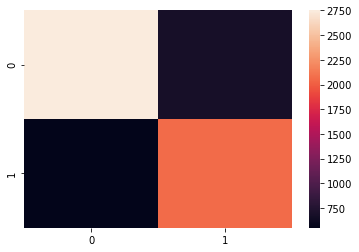

In [152]:
sns.heatmap(cm1)

In [153]:
pred_probLR = log_model.predict_proba(x_test_scaler)

In [154]:
from sklearn.metrics import roc_auc_score

In [156]:
roc_auc_score(y_test,pred_probLR[:,1])

0.878045019125412

# ROC curve

In [184]:
from sklearn.metrics import roc_curve

In [211]:
fpr1,tpr1,thrs1 = roc_curve(y_test, pred_probSV[:,1], pos_label = 1)
fpr2,tpr2,thrs2 = roc_curve(y_test, pred_probLR[:,1], pos_label = 1)
fpr3,tpr3,thrs3 = roc_curve(y_test, pred_probSV2[:,1], pos_label = 1)

Text(0.5, 1.0, 'ROC curve')

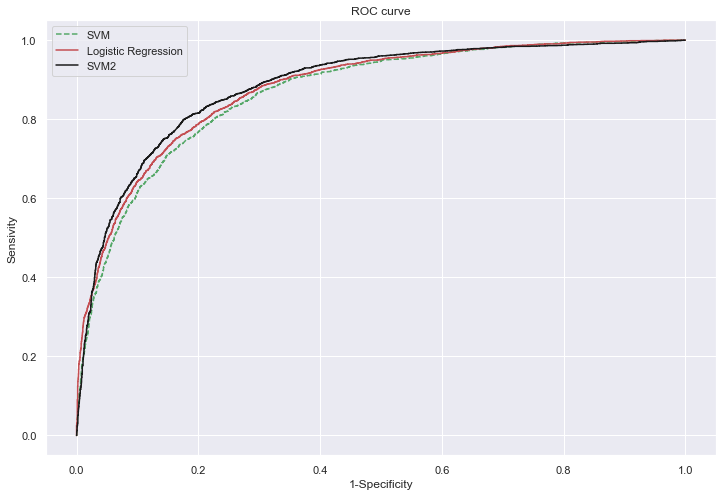

In [214]:
plt.figure(figsize = (12,8))
plt.plot(fpr1,tpr1,'g--')
plt.plot(fpr2,tpr2,"r-")
plt.plot(fpr3,tpr3,"k-")
plt.legend(["SVM","Logistic Regression","SVM2"])
plt.xlabel("1-Specificity")
plt.ylabel("Sensivity")
plt.title("ROC curve")

# Cross_Val_Score

In [215]:
from sklearn.model_selection import cross_val_score

In [219]:
print(cross_val_score(svm_model,x_test_scaler,y_test, cv = 5)) #svm_modle
cv_model2 = cross_val_score(svm_model2,x_test_scaler,y_test,cv = 5)#svm_modle2
print(cross_val_score(log_model,x_test_scaler,y_test,cv = 5))#logistic_regression

[0.77024793 0.75702479 0.77190083 0.77438017 0.76261373]
[0.78842975 0.79256198 0.78429752 0.79504132 0.81141439]


# Average cross val model 2 SVM

In [221]:
import numpy as np
np.mean(cv_model2)

0.7958356404104204